<a href="https://colab.research.google.com/github/youngcheolman/practice/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EA%B0%80%EC%84%A4_%EC%A6%9D%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가설 - “수강생들의 수업 완료 시간대는 주로 한가한 주말일 것이다"

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('done_detail.csv')
df.head()

,lecture_id,done_date,user_id
0,5f266927e67b8fcf4340c08e,2020-08-07 12:02:16,78ff837c7cea9f33
1,5f266927e67b8fcf4340c08b,2020-08-08 1:14:59,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c090,2020-08-17 17:10:49,23182525e9996864
3,5f35370cf9b9ed3dee7f1b72,2020-08-30 23:42:58,ffb6913842d617a5
4,5f35370cf9b9ed3dee7f1b6e,2020-08-25 16:56:15,2c6822e7e833dc95


In [12]:
# 시계열 데이터로 전환
print(type(df['done_date'][0]))
format='%Y-%m-%dT%H:%M:%S.%f'
df['done_date_time'] = pd.to_datetime(df['done_date'], format='mixed')
df.head()

<class 'str'>


,lecture_id,done_date,user_id,done_date_time
0,5f266927e67b8fcf4340c08e,2020-08-07 12:02:16,78ff837c7cea9f33,2020-08-07 12:02:16
1,5f266927e67b8fcf4340c08b,2020-08-08 1:14:59,2987aa87d23c9e3d,2020-08-08 01:14:59
2,5f266927e67b8fcf4340c090,2020-08-17 17:10:49,23182525e9996864,2020-08-17 17:10:49
3,5f35370cf9b9ed3dee7f1b72,2020-08-30 23:42:58,ffb6913842d617a5,2020-08-30 23:42:58
4,5f35370cf9b9ed3dee7f1b6e,2020-08-25 16:56:15,2c6822e7e833dc95,2020-08-25 16:56:15


In [13]:
# 요일 변수 생성
df['done_date_time_weekday'] = df['done_date_time'].dt.day_name()
df.tail(5)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234,2020-08-06 00:06:13,Thursday
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235,2020-08-30 00:17:10,Sunday
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236,2020-08-15 23:11:47,Saturday
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237,2020-08-15 21:35:33,Saturday
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238,2020-08-18 18:12:39,Tuesday


In [14]:
#요일별로 수강한 학생들의 수를 구하기
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = df.groupby('done_date_time_weekday')['user_id'].count()
weekdata = weekdata.agg(weeks)
weekdata

,user_id
Monday,1354
Tuesday,1624
Wednesday,887
Thursday,937
Friday,859
Saturday,926
Sunday,1541


In [15]:
import matplotlib.pyplot as plt
import numpy as np

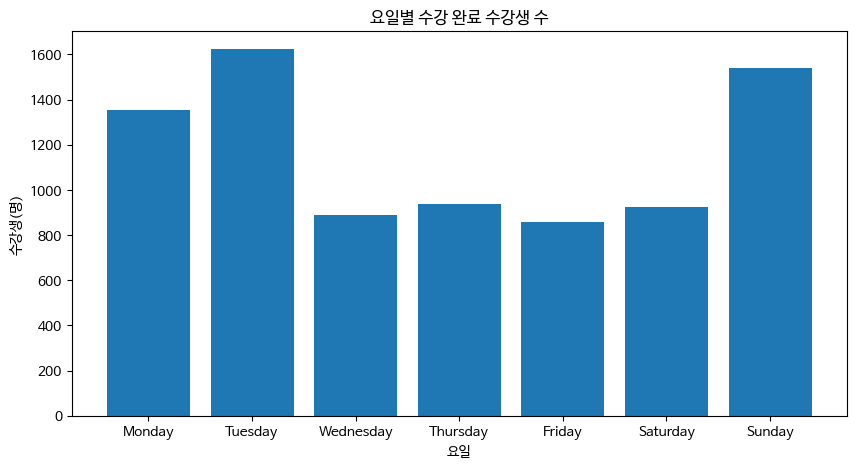

In [16]:
####요일별 수강생 수 바 그래프 그리기#########

#그래프 사이즈
plt.figure(figsize=(10,5))
plt.rc('font', family='NanumBarunGothic')

#그래프 x축 y축
plt.bar(weekdata.index, weekdata)

#그래프 명
plt.title('요일별 수강 완료 수강생 수')

#그래프 x축 레이블
plt.xlabel('요일')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을 90도로 변환
plt.xticks(rotation=0)

#그래프 출력
plt.show()

In [17]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [18]:
# 실제로 수강 완료가 가장 많이 된 요일은 화요일, 일요일 월요일 순으로 많기 때문에
# "수강생들의 수업 완료 시간대는 주로 한가한 주말일 것이다" 라는 가설은 기각된다.